## Task02：数据分析



## 1.EDA目标
- EDA的价值主要在于熟悉数据集，了解数据集，对数据集进行验证来确定所获得数据集可以用于接下来的机器学习或者深度学习使用。
- 当了解了数据集之后我们下一步就是要去了解变量间的相互关系以及变量与预测值之间的存在关系。
- 引导数据科学从业者进行数据处理以及特征工程的步骤,使数据集的结构和特征集让接下来的预测问题更加可靠。
- 完成对于数据的探索性分析，并对于数据进行一些图表或者文字总结。

## 2.代码与学习


### 2.1导入所需的库与数据

In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# 导入数据
Train_data = pd.read_csv('../input/ershouche/used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv('../input/ershouche/used_car_testA_20200313.csv', sep=' ')
print('Train data shape:',Train_data.shape)
print('TestA data shape:',Test_data.shape)

Train data shape: (150000, 31)
TestA data shape: (50000, 30)


### 2.2 总体上查看数据

In [3]:
# 简单查看数据
Train_data.head().append(Train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [4]:
# 总览数据概况1
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [5]:
# 总览数据概况2
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

### 2.3 判断数据缺失与异常

In [6]:
# 1) 查看每列存在nan的情况
Train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [7]:
Test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

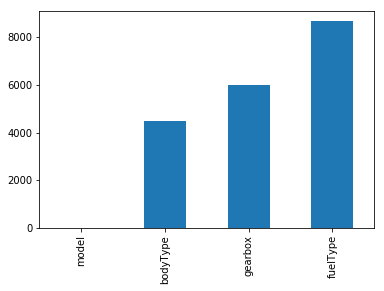

In [8]:
# nan可视化
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

通过以上两句可以很直观的了解哪些列存在 “nan”, 并可以把nan的个数打印。

主要的目的在于nan存在的个数是否真的很大，如果很小一般选择填充，如果使用lgb等树模型可以直接空缺，让树自己去优化，但如果nan存在的过多、可以考虑删掉。

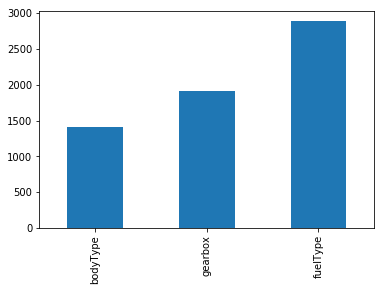

In [9]:
# nan可视化
missing = Test_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

测试集的缺省和训练集的差不多情况, 可视化有四列有缺省，fuelType缺省得最多

但相对于总的数据量来说，缺失的并不多

In [10]:
# 2) 查看异常值检测
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

可以发现除了notRepairedDamage 为object类型其他都为数字，这里我们把他的几个不同的值都进行显示就知道了

In [11]:
Train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

可以看出来‘ - ’也为空缺值，因为很多模型对nan有直接的处理，这里我们先把‘-’替换成nan

In [12]:
Train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [13]:
Train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [14]:
Train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

现在缺失值最多的变成了notRepairedDamage

对test_data做同样的处理

In [15]:
Test_data['notRepairedDamage'].value_counts()

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

In [16]:
Test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [17]:
Test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage    8031
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

以下两个类别特征严重倾斜，一般不会对预测有什么帮助，故这边先删掉，当然你也可以继续挖掘，但是一般意义不大

其实应该先通过可视化的手段来发现

In [18]:
Train_data["seller"].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [19]:
Train_data["offerType"].value_counts()

0    150000
Name: offerType, dtype: int64

In [20]:
del Train_data["seller"]
del Train_data["offerType"]
del Test_data["seller"]
del Test_data["offerType"]

### 2.4 了解预测值的分布

In [21]:
Train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

数据种类过多，使用可视化的效果会更好

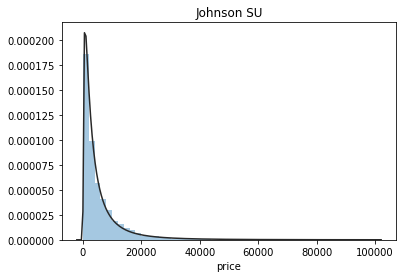

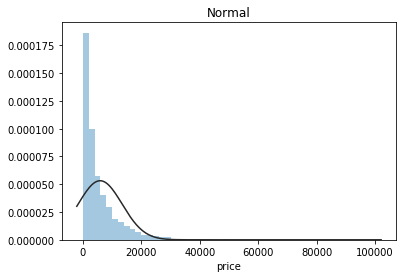

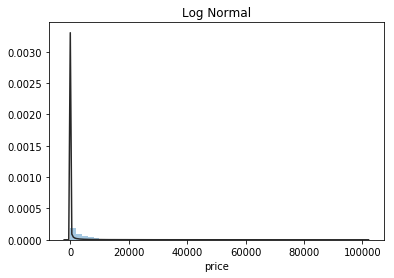

In [22]:
# 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = Train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

价格不服从正态分布，所以在进行回归之前，它必须进行转换。虽然对数变换做得很好，但最佳拟合是无界约翰逊分布

Skewness: 3.346487
Kurtosis: 18.995183


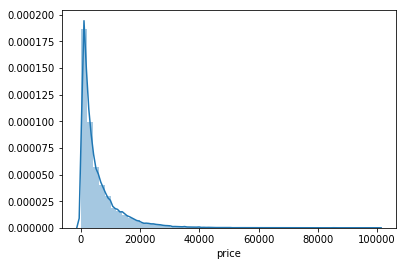

In [23]:
## 2) 查看skewness and kurtosis
sns.distplot(Train_data['price']);
print("Skewness: %f" % Train_data['price'].skew())
print("Kurtosis: %f" % Train_data['price'].kurt())

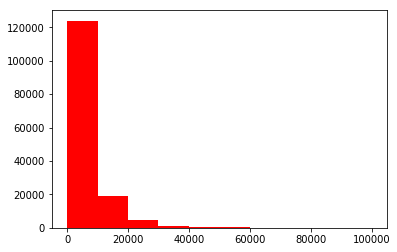

In [24]:
# 3) 查看预测值的具体频数
plt.hist(Train_data['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

查看频数, 大于20000的值极少，其实这里也可以把这些当作特殊的值（异常值）直接填充或者删掉

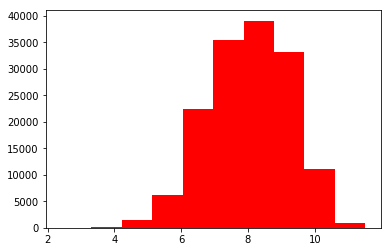

In [25]:
# log变换price之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()

### 2.5 特征分为类别特征和数字特征，并对类别特征查看unique分布

#### 数据类型
#### 列
- name - 汽车编码
- regDate - 汽车注册时间
- model - 车型编码
- brand - 品牌
- bodyType - 车身类型
- fuelType - 燃油类型
- gearbox - 变速箱
- power - 汽车功率
- kilometer - 汽车行驶公里
- notRepairedDamage - 汽车有尚未修复的损坏
- regionCode - 看车地区编码
- seller - 销售方 【以删】
- offerType - 报价类型 【以删】
- creatDate - 广告发布时间
- price - 汽车价格
- v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14'【匿名特征，包含v0-14在内15个匿名特征】

In [26]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 
                    'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [27]:
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
body

In [28]:
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Test_data[cat_fea].nunique()))
    print(Test_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个37453不同的值
55       97
708      96
387      95
1541     88
713      74
         ..
22270     1
89855     1
42752     1
48899     1
11808     1
Name: name, Length: 37453, dtype: int64
model的特征分布如下：
model特征有个247不同的值
0.0      3896
19.0     3245
4.0      3007
1.0      1981
29.0     1742
         ... 
242.0       1
240.0       1
244.0       1
243.0       1
246.0       1
Name: model, Length: 247, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     10348
4      5763
14     5314
10     4766
1      4532
6      3502
9      2423
5      1569
13     1245
11      919
7       795
3       773
16      771
8       704
25      695
27      650
21      544
15      511
20      450
19      450
12      389
22      363
30      324
17      317
26      303
24      268
28      225
32      193
29      117
31      115
18      106
2       104
37       92
34       77
33       76
36       67
23       62
35       53
38       23
39        2
Name: brand, dtype: int64
bodyType的特征分布如下：
bodyType特征有个8不同的值
0.

### 2.6 数字特征分析

In [29]:
numeric_features.append('price')
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [30]:
# 1) 相关性分析
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



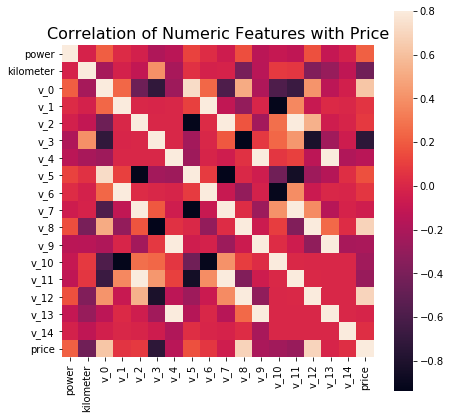

In [31]:
f , ax = plt.subplots(figsize = (7, 7))

plt.title('Correlation of Numeric Features with Price',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

In [32]:
# 2) 查看几个特征的偏度和峰值
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(Train_data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(Train_data[col].kurt())  
         )

power           Skewness: 65.86     Kurtosis: 5733.45
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.84     Kurtosis: 023.86
v_3             Skewness: 00.11     Kurtosis: -00.42
v_4             Skewness: 00.37     Kurtosis: -00.20
v_5             Skewness: -4.74     Kurtosis: 022.93
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_8             Skewness: 00.20     Kurtosis: -00.64
v_9             Skewness: 00.42     Kurtosis: -00.32
v_10            Skewness: 00.03     Kurtosis: -00.58
v_11            Skewness: 03.03     Kurtosis: 012.57
v_12            Skewness: 00.37     Kurtosis: 000.27
v_13            Skewness: 00.27     Kurtosis: -00.44
v_14            Skewness: -1.19     Kurtosis: 002.39
price           Skewness: 03.35     Kurtosis: 019.00


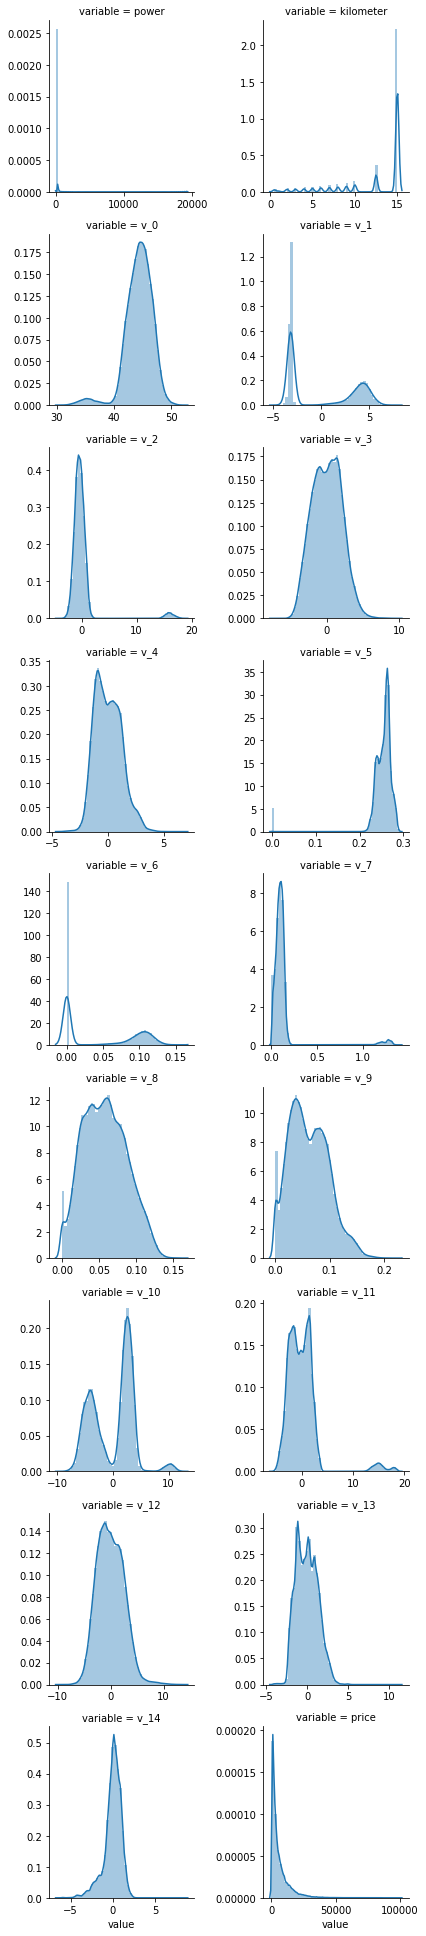

In [33]:
# 3) 每个数字特征的分布可视化
f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

可以看出匿名特征相对分布均匀

接下来还可画每个数字特征与price之间的相互关系图，可以参考以前的学习笔记

### 2.7 类别特征分析

In [34]:
## 1) unique分布
for fea in categorical_features:
    print(Train_data[fea].nunique())

99662
248
40
8
7
2
2
7905


In [35]:
categorical_features

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode']

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


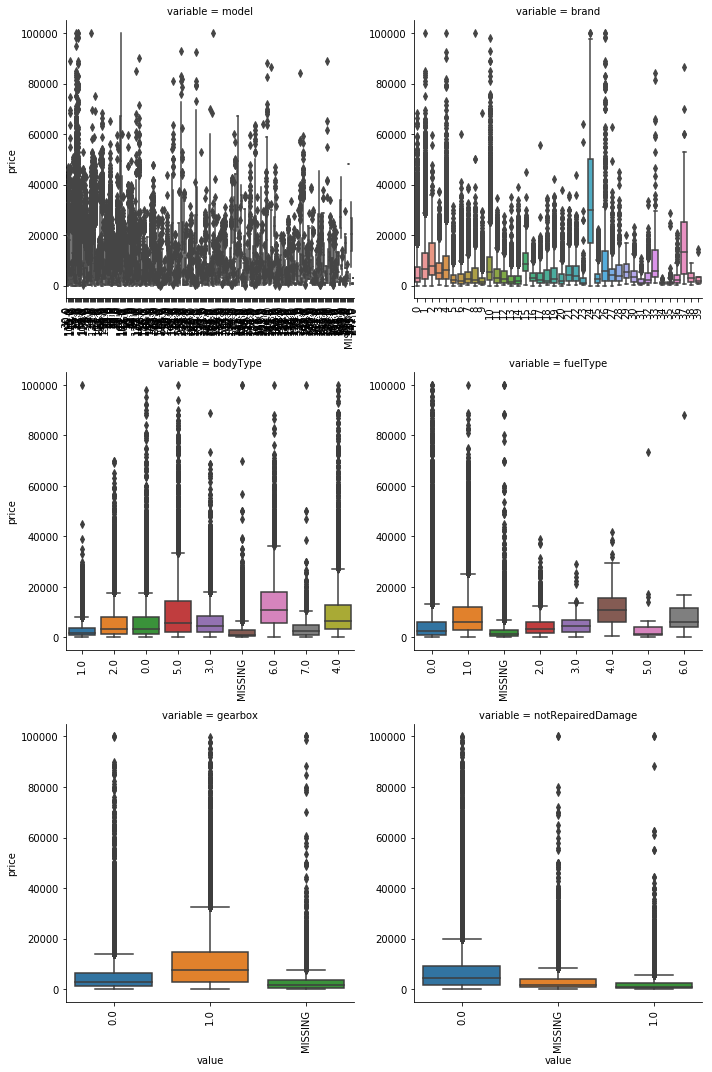

In [36]:
# 2) 类别特征箱形图可视化
# 因为 name和 regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c] = Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c] = Train_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

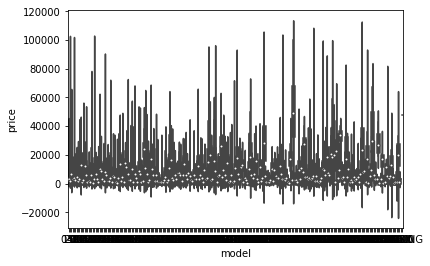

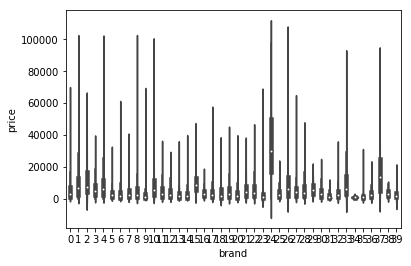

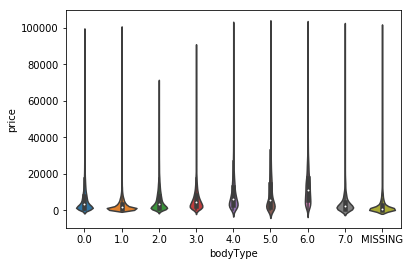

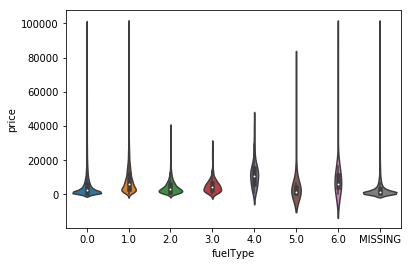

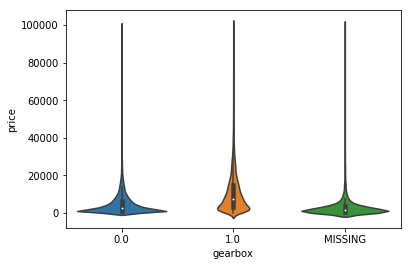

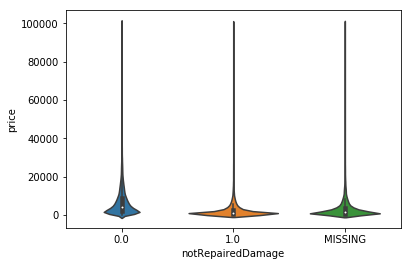

In [37]:
# 3) 类别特征的小提琴图可视化
catg_list = categorical_features
target = 'price'
for catg in catg_list :
    sns.violinplot(x=catg, y=target, data=Train_data)
    plt.show()